# Deep Markov Models

Here we show an example of deep Markov Models, as proposed by Krishnan, Shalit and Sontag (AAAI 2017), which subsumes the previously proposed deep Kalman filter.

## Joint Model

The proposed approach is a non-linear state space model, given by the following generative approach specifying the corresponding transition and emission distributions:
\begin{align}
    z_t & \sim \mathcal{N}(G_\alpha(z_{t-1}, \Delta_t), S_\beta(z_{t-1}, \Delta_t)) , \\
    x_t & \sim \Pi(F_\kappa(z_t)) ,
\end{align}
where $G_\alpha$, $S_\beta$ and $F_\kappa$ are *non-linear* functions specified, e.g., by deep neural networks and $\theta = \{ \alpha, \beta, \kappa\}$ are the parameters of the generative model. We note that standard linear state space models are one particular specification of the above model.

## Posterior Inference 
Perhaps the main point of this approach is to parameterize the approximate posterior efficiently while respecting the structure of the full posterior. Indeed, it is easy to show that the structure of the true posterior is given by:
\begin{equation}
    q_\phi(z | x) = q_\phi(z_1 | x) \prod_{t=2}^T q_\phi(z_t | z_{t-1}, x_t, \ldots, x_T),
\end{equation}
where we see that each of individual distribution in the factor above only depends on the current/future observations and the previous latent state. This factorization faciliates variational inference as one also gets a decomposition of the KL terms that can be estimated efficiently.

The main idea here is than, in principle, one could recover the true posterior if $q_\phi$ was sufficently flexible. However, in the proposed approach the individual distributions are Gaussians with parameters also given by deep neural networks
\begin{equation}
    q_\phi(z_t | z_{t-1}, x_t, \ldots, x_T) = \mathcal{N}(\mu_\phi(z_{t-1}, x_t, \ldots, x_T), \Sigma_\phi(z_{t-1}, x_t, \ldots, x_T))
\end{equation}

Thus, the main benefit of their approach are not that of having a more flexible posterior but that of a more efficient parameterization along with a sound inference framework for estimation of both the posterior and the parameters of the generative model, although one has to be careful with the latter, which I believe is what the deep variational Bayes filter paper tries to address.

In the experiments, MLPs are used for the generative model (emissions and transitions) while RNNs are used to parameterize the approximate posterior.


In [1]:
import sys 
sys.path.append('../')
sys.path.append('../../theanomodels')
sys.path.append('../../bayestrack_datasets')


In [14]:
from expt.run_lorenz import load_lorenz, visualize_data, run_model, load_model_elbo, sample_from_model

Reloading dataset from /Users/bon136/Documents/deep-Markov-Models/dmm/expt/lorenz.pkl
Read  1  objects
state.shape=(716, 40, 3)


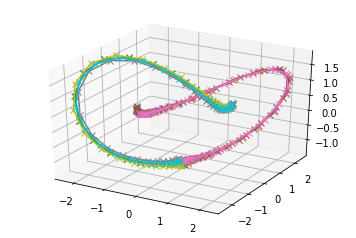

In [4]:
# Loads and visualizes a simple lorenz-64 attractor
# The data is of the form NxTx3
dataset = load_lorenz()
visualize_data(dataset['train']['tensor'], n_samples=10)

In [5]:
# Run Deep Markov Model
run_model()

Reloading dataset from /Users/bon136/Documents/deep-Markov-Models/dmm/expt/lorenz.pkl
Read  1  objects
Read  1  objects
dataset 	mm
epochs 	2000
seed 	1
init_weight 	0.1
dim_stochastic 	100
expt_name 	uid
reg_value 	0.05
reloadFile 	./NOSUCHFILE
reg_spec 	_
dim_hidden 	200
lr 	0.0008
reg_type 	l2
init_scheme 	uniform
optimizer 	adam
use_generative_prior 	approx
maxout_stride 	4
batch_size 	20
savedir 	./chkpt
forget_bias 	-5.0
inference_model 	R
emission_layers 	2
savefreq 	10
rnn_cell 	lstm
rnn_size 	600
paramFile 	./NOSUCHFILE
nonlinearity 	relu
rnn_dropout 	0.1
transition_layers 	2
anneal_rate 	2.0
debug 	False
validate_only 	False
transition_type 	mlp
unique_id 	DMM_lr-0_0008-dh-200-ds-100-nl-relu-bs-20-ep-2000-rs-600-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid
leaky_param 	0.0
{'dataset': 'mm', 'epochs': 1000, 'seed': 1, 'init_weight': 0.1, 'dim_stochastic': 3, 'expt_name': 'uid', 'reg_value': 0.05, 'reloadFile': './NOSUCHFILE', 'reg_spec': '_', 'dim_hidden': 40, 'lr':

	<<(Ep 13) Bound: 4.2592 [Took 1.0627 seconds] >>
	<<Bnum: 0, Batch Bound: 4.2595, |w|: 31.8940, |dw|: 1.0000, |w_opt|: 0.3180>>
	<<-veCLL:34056.2520, KL:19.9389, anneal:1.0000>>
	<<(Ep 14) Bound: 4.2590 [Took 1.0665 seconds] >>
	<<Bnum: 0, Batch Bound: 4.2568, |w|: 31.6744, |dw|: 1.0000, |w_opt|: 0.2826>>
	<<-veCLL:34034.7197, KL:19.3913, anneal:1.0000>>
	<<(Ep 15) Bound: 4.2590 [Took 1.0430 seconds] >>
	<<Bnum: 0, Batch Bound: 4.2602, |w|: 31.4760, |dw|: 1.0000, |w_opt|: 0.2569>>
	<<-veCLL:34062.7194, KL:18.7237, anneal:1.0000>>
	<<(Ep 16) Bound: 4.2583 [Took 1.0486 seconds] >>
	<<Bnum: 0, Batch Bound: 4.2641, |w|: 31.2940, |dw|: 1.0000, |w_opt|: 0.2447>>
	<<-veCLL:34094.4899, KL:18.3199, anneal:1.0000>>
	<<(Ep 17) Bound: 4.2584 [Took 1.0298 seconds] >>
	<<Bnum: 0, Batch Bound: 4.2580, |w|: 31.1263, |dw|: 1.0000, |w_opt|: 0.2309>>
	<<-veCLL:34046.0941, KL:17.8848, anneal:1.0000>>
	<<(Ep 18) Bound: 4.2585 [Took 1.0453 seconds] >>
	<<Bnum: 0, Batch Bound: 4.2562, |w|: 30.9553, |dw|: 1.

	<<Bnum: 0, Batch Bound: 3.0787, |w|: 31.0400, |dw|: 1.0000, |w_opt|: 0.5074>>
	<<-veCLL:21919.2164, KL:2710.4416, anneal:1.0000>>
	<<(Ep 50) Bound: 3.0867 [Took 1.1382 seconds] >>
	<<Saving at epoch 50>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP50-params) 
		 opt (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP50-optParams) weights>>
	<<Original dim: [716  40   3],[716  40]>>
	<<New dim: [104  40   3],[104  40]>>
	<<(Evaluate) Validation Bound: 3.0323 [Took 0.0435 seconds]>>
	<<Original dim: [104  40   3],[104  40]>>
	<<New dim: [716  40   3],[716  40]>>
	<<Bnum: 0, Batch Bound: 3.0559, |w|: 31.1155, |dw|: 1.0000, |w_opt|: 0.4825>>
	<<-veCLL:21585.2032, KL:2862.0669, anneal:1.0000>>
	<<(Ep 51) Bound: 3.0675 [Took 1.1046 seconds] >>
	<<Bnum: 0, Batch Bound: 3.0306, |w|: 31.1861, |dw|: 1.0000, |w_opt|: 0.472

	<<Bnum: 0, Batch Bound: 1.7786, |w|: 32.7297, |dw|: 1.0000, |w_opt|: 0.2636>>
	<<-veCLL:8553.1241, KL:5675.4014, anneal:1.0000>>
	<<(Ep 83) Bound: 1.7827 [Took 1.1130 seconds] >>
	<<Bnum: 0, Batch Bound: 1.7721, |w|: 32.7573, |dw|: 1.0000, |w_opt|: 0.2699>>
	<<-veCLL:8541.9752, KL:5634.4401, anneal:1.0000>>
	<<(Ep 84) Bound: 1.7481 [Took 1.2045 seconds] >>
	<<Bnum: 0, Batch Bound: 1.7146, |w|: 32.7855, |dw|: 1.0000, |w_opt|: 0.2181>>
	<<-veCLL:8117.0571, KL:5600.0720, anneal:1.0000>>
	<<(Ep 85) Bound: 1.6929 [Took 1.1074 seconds] >>
	<<Bnum: 0, Batch Bound: 1.6441, |w|: 32.8134, |dw|: 1.0000, |w_opt|: 0.2437>>
	<<-veCLL:7488.3405, KL:5664.6557, anneal:1.0000>>
	<<(Ep 86) Bound: 1.6345 [Took 1.0985 seconds] >>
	<<Bnum: 0, Batch Bound: 1.6661, |w|: 32.8396, |dw|: 1.0000, |w_opt|: 0.2288>>
	<<-veCLL:7696.0241, KL:5632.7338, anneal:1.0000>>
	<<(Ep 87) Bound: 1.6046 [Took 1.1658 seconds] >>
	<<Bnum: 0, Batch Bound: 1.5343, |w|: 32.8659, |dw|: 1.0000, |w_opt|: 0.2350>>
	<<-veCLL:6680.9048, 

	<<(Ep 119) Bound: 0.5328 [Took 1.0768 seconds] >>
	<<Bnum: 0, Batch Bound: 0.5125, |w|: 33.6334, |dw|: 1.0000, |w_opt|: 0.1304>>
	<<-veCLL:-2579.0172, KL:6678.7581, anneal:1.0000>>
	<<(Ep 120) Bound: 0.5095 [Took 1.0913 seconds] >>
	<<Saving at epoch 120>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP120-params) 
		 opt (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP120-optParams) weights>>
	<<Original dim: [716  40   3],[716  40]>>
	<<New dim: [104  40   3],[104  40]>>
	<<(Evaluate) Validation Bound: 0.3113 [Took 0.0386 seconds]>>
	<<Original dim: [104  40   3],[104  40]>>
	<<New dim: [716  40   3],[716  40]>>
	<<Bnum: 0, Batch Bound: 0.5387, |w|: 33.6498, |dw|: 1.0000, |w_opt|: 0.1239>>
	<<-veCLL:-2436.7755, KL:6746.7605, anneal:1.0000>>
	<<(Ep 121) Bound: 0.4897 [Took 1.0741 seconds] >>
	<<Bnum: 0, Batch B

	<<(Ep 152) Bound: -0.1236 [Took 1.0945 seconds] >>
	<<Bnum: 0, Batch Bound: -0.1167, |w|: 34.1738, |dw|: 1.0000, |w_opt|: 0.1143>>
	<<-veCLL:-8464.0444, KL:7530.4068, anneal:1.0000>>
	<<(Ep 153) Bound: -0.1371 [Took 1.0892 seconds] >>
	<<Bnum: 0, Batch Bound: -0.1512, |w|: 34.1884, |dw|: 1.0000, |w_opt|: 0.1358>>
	<<-veCLL:-8822.7670, KL:7612.8078, anneal:1.0000>>
	<<(Ep 154) Bound: -0.1580 [Took 1.0836 seconds] >>
	<<Bnum: 0, Batch Bound: -0.1394, |w|: 34.2028, |dw|: 1.0000, |w_opt|: 0.1081>>
	<<-veCLL:-8692.9832, KL:7577.6274, anneal:1.0000>>
	<<(Ep 155) Bound: -0.1799 [Took 1.0885 seconds] >>
	<<Bnum: 0, Batch Bound: -0.1841, |w|: 34.2167, |dw|: 1.0000, |w_opt|: 0.1190>>
	<<-veCLL:-9053.4385, KL:7580.4672, anneal:1.0000>>
	<<(Ep 156) Bound: -0.1941 [Took 1.0824 seconds] >>
	<<Bnum: 0, Batch Bound: -0.2364, |w|: 34.2306, |dw|: 1.0000, |w_opt|: 0.1093>>
	<<-veCLL:-9448.8651, KL:7557.9385, anneal:1.0000>>
	<<(Ep 157) Bound: -0.2070 [Took 1.0731 seconds] >>
	<<Bnum: 0, Batch Bound: -0.

	<<Bnum: 0, Batch Bound: -0.6930, |w|: 34.5838, |dw|: 1.0000, |w_opt|: 0.1214>>
	<<-veCLL:-13587.1493, KL:8043.0954, anneal:1.0000>>
	<<(Ep 188) Bound: -0.6867 [Took 1.0968 seconds] >>
	<<Bnum: 0, Batch Bound: -0.6869, |w|: 34.5937, |dw|: 1.0000, |w_opt|: 0.1227>>
	<<-veCLL:-13667.9529, KL:8172.6444, anneal:1.0000>>
	<<(Ep 189) Bound: -0.7086 [Took 1.0814 seconds] >>
	<<Bnum: 0, Batch Bound: -0.7450, |w|: 34.6016, |dw|: 1.0000, |w_opt|: 0.1337>>
	<<-veCLL:-13997.2790, KL:8037.2595, anneal:1.0000>>
	<<(Ep 190) Bound: -0.7173 [Took 1.0954 seconds] >>
	<<Saving at epoch 190>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP190-params) 
		 opt (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP190-optParams) weights>>
	<<Original dim: [716  40   3],[716  40]>>
	<<New dim: [104  40   3],[104  40]>>
	<<(Evaluate) Validatio

	<<Bnum: 0, Batch Bound: -0.9491, |w|: 34.8360, |dw|: 1.0000, |w_opt|: 0.1128>>
	<<-veCLL:-16153.3321, KL:8560.7405, anneal:1.0000>>
	<<(Ep 221) Bound: -0.9274 [Took 1.0856 seconds] >>
	<<Bnum: 0, Batch Bound: -0.9779, |w|: 34.8448, |dw|: 1.0000, |w_opt|: 0.1553>>
	<<-veCLL:-16368.5821, KL:8545.3671, anneal:1.0000>>
	<<(Ep 222) Bound: -0.9544 [Took 1.0950 seconds] >>
	<<Bnum: 0, Batch Bound: -0.9717, |w|: 34.8487, |dw|: 1.0000, |w_opt|: 0.1195>>
	<<-veCLL:-16249.4651, KL:8475.8545, anneal:1.0000>>
	<<(Ep 223) Bound: -1.0009 [Took 1.0942 seconds] >>
	<<Bnum: 0, Batch Bound: -0.9974, |w|: 34.8537, |dw|: 1.0000, |w_opt|: 0.1007>>
	<<-veCLL:-16442.1283, KL:8463.2724, anneal:1.0000>>
	<<(Ep 224) Bound: -0.9901 [Took 1.0765 seconds] >>
	<<Bnum: 0, Batch Bound: -0.9956, |w|: 34.8580, |dw|: 1.0000, |w_opt|: 0.1767>>
	<<-veCLL:-16419.8763, KL:8455.2585, anneal:1.0000>>
	<<(Ep 225) Bound: -0.9905 [Took 1.0774 seconds] >>
	<<Bnum: 0, Batch Bound: -1.0017, |w|: 34.8633, |dw|: 1.0000, |w_opt|: 0.09

	<<(Ep 256) Bound: -1.2010 [Took 1.1972 seconds] >>
	<<Bnum: 0, Batch Bound: -1.2073, |w|: 35.0555, |dw|: 1.0000, |w_opt|: 0.0797>>
	<<-veCLL:-18403.4345, KL:8745.1491, anneal:1.0000>>
	<<(Ep 257) Bound: -1.2117 [Took 1.1890 seconds] >>
	<<Bnum: 0, Batch Bound: -1.1710, |w|: 35.0613, |dw|: 1.0000, |w_opt|: 0.1087>>
	<<-veCLL:-18199.7661, KL:8831.7203, anneal:1.0000>>
	<<(Ep 258) Bound: -1.1912 [Took 1.2012 seconds] >>
	<<Bnum: 0, Batch Bound: -1.1912, |w|: 35.0661, |dw|: 1.0000, |w_opt|: 0.0946>>
	<<-veCLL:-18363.9407, KL:8834.4389, anneal:1.0000>>
	<<(Ep 259) Bound: -1.1953 [Took 1.2006 seconds] >>
	<<Bnum: 0, Batch Bound: -1.2477, |w|: 35.0697, |dw|: 1.0000, |w_opt|: 0.1183>>
	<<-veCLL:-18753.0649, KL:8771.6282, anneal:1.0000>>
	<<(Ep 260) Bound: -1.2224 [Took 1.2115 seconds] >>
	<<Saving at epoch 260>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP260-params) 
		 opt (./chkpt/lorenz/DMM_

	<<Bnum: 0, Batch Bound: -1.3123, |w|: 35.2277, |dw|: 1.0000, |w_opt|: 0.1257>>
	<<-veCLL:-19697.1875, KL:9198.7299, anneal:1.0000>>
	<<(Ep 291) Bound: -1.3294 [Took 1.1972 seconds] >>
	<<Bnum: 0, Batch Bound: -1.3077, |w|: 35.2329, |dw|: 1.0000, |w_opt|: 0.0941>>
	<<-veCLL:-19488.4381, KL:9027.2087, anneal:1.0000>>
	<<(Ep 292) Bound: -1.3123 [Took 1.1916 seconds] >>
	<<Bnum: 0, Batch Bound: -1.3132, |w|: 35.2404, |dw|: 1.0000, |w_opt|: 0.1131>>
	<<-veCLL:-19609.3949, KL:9104.1577, anneal:1.0000>>
	<<(Ep 293) Bound: -1.3396 [Took 1.2054 seconds] >>
	<<Bnum: 0, Batch Bound: -1.4133, |w|: 35.2455, |dw|: 1.0000, |w_opt|: 0.1329>>
	<<-veCLL:-20203.0488, KL:8896.7097, anneal:1.0000>>
	<<(Ep 294) Bound: -1.3862 [Took 1.2318 seconds] >>
	<<Bnum: 0, Batch Bound: -1.3473, |w|: 35.2503, |dw|: 1.0000, |w_opt|: 0.0995>>
	<<-veCLL:-19811.5134, KL:9033.0793, anneal:1.0000>>
	<<(Ep 295) Bound: -1.3705 [Took 1.2668 seconds] >>
	<<Bnum: 0, Batch Bound: -1.3913, |w|: 35.2569, |dw|: 1.0000, |w_opt|: 0.10

	<<(Ep 326) Bound: -1.4779 [Took 1.1957 seconds] >>
	<<Bnum: 0, Batch Bound: -1.4455, |w|: 35.4194, |dw|: 1.0000, |w_opt|: 0.0837>>
	<<-veCLL:-20848.5772, KL:9284.5854, anneal:1.0000>>
	<<(Ep 327) Bound: -1.4650 [Took 1.1951 seconds] >>
	<<Bnum: 0, Batch Bound: -1.4418, |w|: 35.4250, |dw|: 1.0000, |w_opt|: 0.1168>>
	<<-veCLL:-20798.6695, KL:9263.8844, anneal:1.0000>>
	<<(Ep 328) Bound: -1.4582 [Took 1.1879 seconds] >>
	<<Bnum: 0, Batch Bound: -1.4494, |w|: 35.4304, |dw|: 1.0000, |w_opt|: 0.1265>>
	<<-veCLL:-20800.2366, KL:9204.7837, anneal:1.0000>>
	<<(Ep 329) Bound: -1.4675 [Took 1.1834 seconds] >>
	<<Bnum: 0, Batch Bound: -1.4261, |w|: 35.4335, |dw|: 1.0000, |w_opt|: 0.1253>>
	<<-veCLL:-20577.6396, KL:9168.6028, anneal:1.0000>>
	<<(Ep 330) Bound: -1.4690 [Took 1.1887 seconds] >>
	<<Saving at epoch 330>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP330-params) 
		 opt (./chkpt/lorenz/DMM_

	<<Bnum: 0, Batch Bound: -1.5788, |w|: 35.6036, |dw|: 1.0000, |w_opt|: 0.1261>>
	<<-veCLL:-22047.3523, KL:9416.7575, anneal:1.0000>>
	<<(Ep 361) Bound: -1.5644 [Took 1.2174 seconds] >>
	<<Bnum: 0, Batch Bound: -1.5583, |w|: 35.6074, |dw|: 1.0000, |w_opt|: 0.1257>>
	<<-veCLL:-21774.1094, KL:9307.5066, anneal:1.0000>>
	<<(Ep 362) Bound: -1.5804 [Took 1.3178 seconds] >>
	<<Bnum: 0, Batch Bound: -1.5472, |w|: 35.6123, |dw|: 1.0000, |w_opt|: 0.0873>>
	<<-veCLL:-21642.0934, KL:9264.1744, anneal:1.0000>>
	<<(Ep 363) Bound: -1.5697 [Took 1.2330 seconds] >>
	<<Bnum: 0, Batch Bound: -1.5748, |w|: 35.6142, |dw|: 1.0000, |w_opt|: 0.1105>>
	<<-veCLL:-21715.3460, KL:9116.6010, anneal:1.0000>>
	<<(Ep 364) Bound: -1.5482 [Took 1.1982 seconds] >>
	<<Bnum: 0, Batch Bound: -1.5538, |w|: 35.6179, |dw|: 1.0000, |w_opt|: 0.1507>>
	<<-veCLL:-21721.7211, KL:9291.0770, anneal:1.0000>>
	<<(Ep 365) Bound: -1.5787 [Took 1.1822 seconds] >>
	<<Bnum: 0, Batch Bound: -1.6579, |w|: 35.6211, |dw|: 1.0000, |w_opt|: 0.12

	<<(Ep 396) Bound: -1.6813 [Took 1.1979 seconds] >>
	<<Bnum: 0, Batch Bound: -1.6720, |w|: 35.7650, |dw|: 1.0000, |w_opt|: 0.0838>>
	<<-veCLL:-22639.3136, KL:9263.0054, anneal:1.0000>>
	<<(Ep 397) Bound: -1.6610 [Took 1.2166 seconds] >>
	<<Bnum: 0, Batch Bound: -1.6522, |w|: 35.7708, |dw|: 1.0000, |w_opt|: 0.1091>>
	<<-veCLL:-22620.4767, KL:9403.0720, anneal:1.0000>>
	<<(Ep 398) Bound: -1.6395 [Took 1.2330 seconds] >>
	<<Bnum: 0, Batch Bound: -1.6814, |w|: 35.7743, |dw|: 1.0000, |w_opt|: 0.1195>>
	<<-veCLL:-22913.7595, KL:9462.7869, anneal:1.0000>>
	<<(Ep 399) Bound: -1.6728 [Took 1.2332 seconds] >>
	<<Bnum: 0, Batch Bound: -1.6862, |w|: 35.7787, |dw|: 1.0000, |w_opt|: 0.1120>>
	<<-veCLL:-22750.4713, KL:9261.1405, anneal:1.0000>>
	<<(Ep 400) Bound: -1.6827 [Took 1.2812 seconds] >>
	<<Saving at epoch 400>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP400-params) 
		 opt (./chkpt/lorenz/DMM_

	<<Bnum: 0, Batch Bound: -1.7680, |w|: 35.9043, |dw|: 1.0000, |w_opt|: 0.0933>>
	<<-veCLL:-23511.8415, KL:9368.1340, anneal:1.0000>>
	<<(Ep 431) Bound: -1.7438 [Took 1.1981 seconds] >>
	<<Bnum: 0, Batch Bound: -1.7743, |w|: 35.9087, |dw|: 1.0000, |w_opt|: 0.0843>>
	<<-veCLL:-23577.6046, KL:9382.9298, anneal:1.0000>>
	<<(Ep 432) Bound: -1.7450 [Took 1.2114 seconds] >>
	<<Bnum: 0, Batch Bound: -1.7478, |w|: 35.9133, |dw|: 1.0000, |w_opt|: 0.0866>>
	<<-veCLL:-23350.5976, KL:9368.0133, anneal:1.0000>>
	<<(Ep 433) Bound: -1.7459 [Took 1.1771 seconds] >>
	<<Bnum: 0, Batch Bound: -1.7736, |w|: 35.9176, |dw|: 1.0000, |w_opt|: 0.1021>>
	<<-veCLL:-23531.7557, KL:9342.7937, anneal:1.0000>>
	<<(Ep 434) Bound: -1.7923 [Took 1.1288 seconds] >>
	<<Bnum: 0, Batch Bound: -1.7445, |w|: 35.9202, |dw|: 1.0000, |w_opt|: 0.0875>>
	<<-veCLL:-23288.7563, KL:9332.3955, anneal:1.0000>>
	<<(Ep 435) Bound: -1.7430 [Took 1.0790 seconds] >>
	<<Bnum: 0, Batch Bound: -1.7695, |w|: 35.9251, |dw|: 1.0000, |w_opt|: 0.09

	<<(Ep 466) Bound: -1.7564 [Took 1.0520 seconds] >>
	<<Bnum: 0, Batch Bound: -1.8002, |w|: 36.0539, |dw|: 1.0000, |w_opt|: 0.1130>>
	<<-veCLL:-23855.3097, KL:9453.5790, anneal:1.0000>>
	<<(Ep 467) Bound: -1.7919 [Took 1.0587 seconds] >>
	<<Bnum: 0, Batch Bound: -1.7455, |w|: 36.0567, |dw|: 1.0000, |w_opt|: 0.1577>>
	<<-veCLL:-23418.8185, KL:9454.5604, anneal:1.0000>>
	<<(Ep 468) Bound: -1.7647 [Took 1.0477 seconds] >>
	<<Bnum: 0, Batch Bound: -1.6862, |w|: 36.0591, |dw|: 1.0000, |w_opt|: 0.0972>>
	<<-veCLL:-23368.9518, KL:9879.1655, anneal:1.0000>>
	<<(Ep 469) Bound: -1.7818 [Took 1.0549 seconds] >>
	<<Bnum: 0, Batch Bound: -1.7745, |w|: 36.0631, |dw|: 1.0000, |w_opt|: 0.1096>>
	<<-veCLL:-23652.2064, KL:9456.2646, anneal:1.0000>>
	<<(Ep 470) Bound: -1.7905 [Took 1.0477 seconds] >>
	<<Saving at epoch 470>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP470-params) 
		 opt (./chkpt/lorenz/DMM_

	<<Bnum: 0, Batch Bound: -1.8899, |w|: 36.1688, |dw|: 1.0000, |w_opt|: 0.1234>>
	<<-veCLL:-24649.5291, KL:9530.3732, anneal:1.0000>>
	<<(Ep 501) Bound: -1.8920 [Took 1.0704 seconds] >>
	<<Bnum: 0, Batch Bound: -1.8823, |w|: 36.1730, |dw|: 1.0000, |w_opt|: 0.1205>>
	<<-veCLL:-24412.8555, KL:9354.6979, anneal:1.0000>>
	<<(Ep 502) Bound: -1.8962 [Took 1.0535 seconds] >>
	<<Bnum: 0, Batch Bound: -1.8373, |w|: 36.1762, |dw|: 1.0000, |w_opt|: 0.1267>>
	<<-veCLL:-24270.8272, KL:9572.7085, anneal:1.0000>>
	<<(Ep 503) Bound: -1.8691 [Took 1.0374 seconds] >>
	<<Bnum: 0, Batch Bound: -1.8616, |w|: 36.1804, |dw|: 1.0000, |w_opt|: 0.0884>>
	<<-veCLL:-24436.5462, KL:9543.7000, anneal:1.0000>>
	<<(Ep 504) Bound: -1.8975 [Took 1.0339 seconds] >>
	<<Bnum: 0, Batch Bound: -1.9232, |w|: 36.1848, |dw|: 1.0000, |w_opt|: 0.0849>>
	<<-veCLL:-24846.4959, KL:9461.2425, anneal:1.0000>>
	<<(Ep 505) Bound: -1.8924 [Took 1.0273 seconds] >>
	<<Bnum: 0, Batch Bound: -1.9724, |w|: 36.1881, |dw|: 1.0000, |w_opt|: 0.08

	<<(Ep 536) Bound: -1.9242 [Took 1.0638 seconds] >>
	<<Bnum: 0, Batch Bound: -1.9142, |w|: 36.3204, |dw|: 1.0000, |w_opt|: 0.0958>>
	<<-veCLL:-24894.8695, KL:9581.4084, anneal:1.0000>>
	<<(Ep 537) Bound: -1.9205 [Took 1.0470 seconds] >>
	<<Bnum: 0, Batch Bound: -1.9843, |w|: 36.3231, |dw|: 1.0000, |w_opt|: 0.1031>>
	<<-veCLL:-25388.0528, KL:9513.8335, anneal:1.0000>>
	<<(Ep 538) Bound: -1.9699 [Took 1.0491 seconds] >>
	<<Bnum: 0, Batch Bound: -1.9455, |w|: 36.3272, |dw|: 1.0000, |w_opt|: 0.1141>>
	<<-veCLL:-24986.3958, KL:9422.4973, anneal:1.0000>>
	<<(Ep 539) Bound: -1.9579 [Took 1.0491 seconds] >>
	<<Bnum: 0, Batch Bound: -1.9745, |w|: 36.3340, |dw|: 1.0000, |w_opt|: 0.1257>>
	<<-veCLL:-25311.7236, KL:9515.4972, anneal:1.0000>>
	<<(Ep 540) Bound: -1.9728 [Took 1.0524 seconds] >>
	<<Saving at epoch 540>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP540-params) 
		 opt (./chkpt/lorenz/DMM_

	<<Bnum: 0, Batch Bound: -2.0013, |w|: 36.4704, |dw|: 1.0000, |w_opt|: 0.1188>>
	<<-veCLL:-25636.8076, KL:9626.6234, anneal:1.0000>>
	<<(Ep 571) Bound: -2.0037 [Took 1.0691 seconds] >>
	<<Bnum: 0, Batch Bound: -1.9901, |w|: 36.4760, |dw|: 1.0000, |w_opt|: 0.1004>>
	<<-veCLL:-25566.8566, KL:9645.9686, anneal:1.0000>>
	<<(Ep 572) Bound: -2.0045 [Took 1.0504 seconds] >>
	<<Bnum: 0, Batch Bound: -1.9631, |w|: 36.4826, |dw|: 1.0000, |w_opt|: 0.1392>>
	<<-veCLL:-25237.3907, KL:9532.4258, anneal:1.0000>>
	<<(Ep 573) Bound: -1.9920 [Took 1.0572 seconds] >>
	<<Bnum: 0, Batch Bound: -1.9918, |w|: 36.4884, |dw|: 1.0000, |w_opt|: 0.1073>>
	<<-veCLL:-25415.3865, KL:9480.7171, anneal:1.0000>>
	<<(Ep 574) Bound: -2.0111 [Took 1.0567 seconds] >>
	<<Bnum: 0, Batch Bound: -1.9614, |w|: 36.4916, |dw|: 1.0000, |w_opt|: 0.1263>>
	<<-veCLL:-25433.6150, KL:9742.5762, anneal:1.0000>>
	<<(Ep 575) Bound: -1.9947 [Took 1.0578 seconds] >>
	<<Bnum: 0, Batch Bound: -2.0304, |w|: 36.4969, |dw|: 1.0000, |w_opt|: 0.09

	<<(Ep 606) Bound: -2.0774 [Took 1.0696 seconds] >>
	<<Bnum: 0, Batch Bound: -2.0745, |w|: 36.6286, |dw|: 1.0000, |w_opt|: 0.1217>>
	<<-veCLL:-26122.3701, KL:9526.7504, anneal:1.0000>>
	<<(Ep 607) Bound: -2.0722 [Took 1.0404 seconds] >>
	<<Bnum: 0, Batch Bound: -2.0098, |w|: 36.6310, |dw|: 1.0000, |w_opt|: 0.1200>>
	<<-veCLL:-25766.3004, KL:9687.5413, anneal:1.0000>>
	<<(Ep 608) Bound: -2.0849 [Took 1.0528 seconds] >>
	<<Bnum: 0, Batch Bound: -2.0913, |w|: 36.6356, |dw|: 1.0000, |w_opt|: 0.1279>>
	<<-veCLL:-26251.1639, KL:9520.6153, anneal:1.0000>>
	<<(Ep 609) Bound: -2.0994 [Took 1.0376 seconds] >>
	<<Bnum: 0, Batch Bound: -2.0481, |w|: 36.6415, |dw|: 1.0000, |w_opt|: 0.1168>>
	<<-veCLL:-25986.0912, KL:9601.2602, anneal:1.0000>>
	<<(Ep 610) Bound: -2.0783 [Took 1.0461 seconds] >>
	<<Saving at epoch 610>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP610-params) 
		 opt (./chkpt/lorenz/DMM_

	<<Bnum: 0, Batch Bound: -2.1882, |w|: 36.7810, |dw|: 1.0000, |w_opt|: 0.1170>>
	<<-veCLL:-27016.5925, KL:9510.9975, anneal:1.0000>>
	<<(Ep 641) Bound: -2.1695 [Took 1.0607 seconds] >>
	<<Bnum: 0, Batch Bound: -2.1012, |w|: 36.7860, |dw|: 1.0000, |w_opt|: 0.1311>>
	<<-veCLL:-26412.4299, KL:9603.2290, anneal:1.0000>>
	<<(Ep 642) Bound: -2.1354 [Took 1.0595 seconds] >>
	<<Bnum: 0, Batch Bound: -2.1210, |w|: 36.7910, |dw|: 1.0000, |w_opt|: 0.1234>>
	<<-veCLL:-26562.0545, KL:9594.0320, anneal:1.0000>>
	<<(Ep 643) Bound: -2.1244 [Took 1.0520 seconds] >>
	<<Bnum: 0, Batch Bound: -2.1575, |w|: 36.7946, |dw|: 1.0000, |w_opt|: 0.1175>>
	<<-veCLL:-26892.7690, KL:9632.7025, anneal:1.0000>>
	<<(Ep 644) Bound: -2.1426 [Took 1.0445 seconds] >>
	<<Bnum: 0, Batch Bound: -2.0662, |w|: 36.7969, |dw|: 1.0000, |w_opt|: 0.0895>>
	<<-veCLL:-26149.3264, KL:9619.8161, anneal:1.0000>>
	<<(Ep 645) Bound: -2.0980 [Took 1.0462 seconds] >>
	<<Bnum: 0, Batch Bound: -2.0649, |w|: 36.8024, |dw|: 1.0000, |w_opt|: 0.12

	<<(Ep 676) Bound: -2.2094 [Took 1.0372 seconds] >>
	<<Bnum: 0, Batch Bound: -2.1913, |w|: 36.9505, |dw|: 1.0000, |w_opt|: 0.1156>>
	<<-veCLL:-27319.0027, KL:9788.9987, anneal:1.0000>>
	<<(Ep 677) Bound: -2.1908 [Took 1.0252 seconds] >>
	<<Bnum: 0, Batch Bound: -2.2283, |w|: 36.9551, |dw|: 1.0000, |w_opt|: 0.1037>>
	<<-veCLL:-27393.7961, KL:9567.4670, anneal:1.0000>>
	<<(Ep 678) Bound: -2.2156 [Took 1.8085 seconds] >>
	<<Bnum: 0, Batch Bound: -2.2166, |w|: 36.9598, |dw|: 1.0000, |w_opt|: 0.1116>>
	<<-veCLL:-27308.5120, KL:9575.4388, anneal:1.0000>>
	<<(Ep 679) Bound: -2.2236 [Took 1.6210 seconds] >>
	<<Bnum: 0, Batch Bound: -2.1732, |w|: 36.9643, |dw|: 1.0000, |w_opt|: 0.0952>>
	<<-veCLL:-27042.2282, KL:9656.3156, anneal:1.0000>>
	<<(Ep 680) Bound: -2.1979 [Took 1.2002 seconds] >>
	<<Saving at epoch 680>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP680-params) 
		 opt (./chkpt/lorenz/DMM_

	<<Bnum: 0, Batch Bound: -2.3328, |w|: 37.1172, |dw|: 1.0000, |w_opt|: 0.0992>>
	<<-veCLL:-28379.3131, KL:9716.7745, anneal:1.0000>>
	<<(Ep 711) Bound: -2.2778 [Took 1.0423 seconds] >>
	<<Bnum: 0, Batch Bound: -2.2678, |w|: 37.1238, |dw|: 1.0000, |w_opt|: 0.1098>>
	<<-veCLL:-27942.9755, KL:9800.3987, anneal:1.0000>>
	<<(Ep 712) Bound: -2.2749 [Took 1.0691 seconds] >>
	<<Bnum: 0, Batch Bound: -2.2551, |w|: 37.1288, |dw|: 1.0000, |w_opt|: 0.1045>>
	<<-veCLL:-27788.6374, KL:9748.1761, anneal:1.0000>>
	<<(Ep 713) Bound: -2.2433 [Took 1.0829 seconds] >>
	<<Bnum: 0, Batch Bound: -2.1579, |w|: 37.1341, |dw|: 1.0000, |w_opt|: 0.1792>>
	<<-veCLL:-27020.2609, KL:9757.3244, anneal:1.0000>>
	<<(Ep 714) Bound: -2.1928 [Took 1.0292 seconds] >>
	<<Bnum: 0, Batch Bound: -2.2964, |w|: 37.1375, |dw|: 1.0000, |w_opt|: 0.1302>>
	<<-veCLL:-28045.1643, KL:9673.8453, anneal:1.0000>>
	<<(Ep 715) Bound: -2.2766 [Took 1.0295 seconds] >>
	<<Bnum: 0, Batch Bound: -2.2596, |w|: 37.1410, |dw|: 1.0000, |w_opt|: 0.11

	<<(Ep 746) Bound: -2.3740 [Took 1.0537 seconds] >>
	<<Bnum: 0, Batch Bound: -2.4428, |w|: 37.3120, |dw|: 1.0000, |w_opt|: 0.1324>>
	<<-veCLL:-29283.1504, KL:9740.4446, anneal:1.0000>>
	<<(Ep 747) Bound: -2.3947 [Took 1.0495 seconds] >>
	<<Bnum: 0, Batch Bound: -2.3948, |w|: 37.3178, |dw|: 1.0000, |w_opt|: 0.0919>>
	<<-veCLL:-28953.1177, KL:9794.6313, anneal:1.0000>>
	<<(Ep 748) Bound: -2.4218 [Took 1.0641 seconds] >>
	<<Bnum: 0, Batch Bound: -2.3879, |w|: 37.3239, |dw|: 1.0000, |w_opt|: 0.1231>>
	<<-veCLL:-28873.9228, KL:9771.0376, anneal:1.0000>>
	<<(Ep 749) Bound: -2.4240 [Took 1.0448 seconds] >>
	<<Bnum: 0, Batch Bound: -2.3840, |w|: 37.3310, |dw|: 1.0000, |w_opt|: 0.0966>>
	<<-veCLL:-28857.4339, KL:9785.4701, anneal:1.0000>>
	<<(Ep 750) Bound: -2.3991 [Took 1.0793 seconds] >>
	<<Saving at epoch 750>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP750-params) 
		 opt (./chkpt/lorenz/DMM_

	<<Bnum: 0, Batch Bound: -2.6493, |w|: 37.5323, |dw|: 1.0000, |w_opt|: 0.0926>>
	<<-veCLL:-30882.4517, KL:9688.4148, anneal:1.0000>>
	<<(Ep 781) Bound: -2.5977 [Took 1.0759 seconds] >>
	<<Bnum: 0, Batch Bound: -2.6524, |w|: 37.5409, |dw|: 1.0000, |w_opt|: 0.0986>>
	<<-veCLL:-30984.7751, KL:9765.4651, anneal:1.0000>>
	<<(Ep 782) Bound: -2.6082 [Took 1.1035 seconds] >>
	<<Bnum: 0, Batch Bound: -2.5481, |w|: 37.5479, |dw|: 1.0000, |w_opt|: 0.0879>>
	<<-veCLL:-30315.8661, KL:9930.8921, anneal:1.0000>>
	<<(Ep 783) Bound: -2.5823 [Took 1.0610 seconds] >>
	<<Bnum: 0, Batch Bound: -2.5464, |w|: 37.5565, |dw|: 1.0000, |w_opt|: 0.0876>>
	<<-veCLL:-30304.8969, KL:9933.7438, anneal:1.0000>>
	<<(Ep 784) Bound: -2.6005 [Took 1.0753 seconds] >>
	<<Bnum: 0, Batch Bound: -2.5933, |w|: 37.5637, |dw|: 1.0000, |w_opt|: 0.1050>>
	<<-veCLL:-30712.8588, KL:9966.7544, anneal:1.0000>>
	<<(Ep 785) Bound: -2.6072 [Took 1.0530 seconds] >>
	<<Bnum: 0, Batch Bound: -2.6298, |w|: 37.5718, |dw|: 1.0000, |w_opt|: 0.12

	<<(Ep 816) Bound: -2.7672 [Took 1.0578 seconds] >>
	<<Bnum: 0, Batch Bound: -2.8507, |w|: 37.7808, |dw|: 1.0000, |w_opt|: 0.1268>>
	<<-veCLL:-32773.4491, KL:9967.5879, anneal:1.0000>>
	<<(Ep 817) Bound: -2.8028 [Took 1.0639 seconds] >>
	<<Bnum: 0, Batch Bound: -2.7982, |w|: 37.7879, |dw|: 1.0000, |w_opt|: 0.1279>>
	<<-veCLL:-32249.5314, KL:9863.5517, anneal:1.0000>>
	<<(Ep 818) Bound: -2.8317 [Took 1.0486 seconds] >>
	<<Bnum: 0, Batch Bound: -2.8102, |w|: 37.7938, |dw|: 1.0000, |w_opt|: 0.1100>>
	<<-veCLL:-32489.3035, KL:10007.7939, anneal:1.0000>>
	<<(Ep 819) Bound: -2.8396 [Took 1.0571 seconds] >>
	<<Bnum: 0, Batch Bound: -2.8524, |w|: 37.8004, |dw|: 1.0000, |w_opt|: 0.1117>>
	<<-veCLL:-32733.9873, KL:9915.0263, anneal:1.0000>>
	<<(Ep 820) Bound: -2.8373 [Took 1.0414 seconds] >>
	<<Saving at epoch 820>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP820-params) 
		 opt (./chkpt/lorenz/DMM

	<<Bnum: 0, Batch Bound: -3.0569, |w|: 37.9968, |dw|: 1.0000, |w_opt|: 0.1219>>
	<<-veCLL:-34315.6944, KL:9860.7879, anneal:1.0000>>
	<<(Ep 851) Bound: -2.9962 [Took 1.0845 seconds] >>
	<<Bnum: 0, Batch Bound: -2.9418, |w|: 38.0029, |dw|: 1.0000, |w_opt|: 0.1294>>
	<<-veCLL:-33595.0827, KL:10060.4880, anneal:1.0000>>
	<<(Ep 852) Bound: -2.9810 [Took 1.0992 seconds] >>
	<<Bnum: 0, Batch Bound: -3.0154, |w|: 38.0099, |dw|: 1.0000, |w_opt|: 0.1306>>
	<<-veCLL:-34037.7813, KL:9914.3698, anneal:1.0000>>
	<<(Ep 853) Bound: -2.9752 [Took 1.0920 seconds] >>
	<<Bnum: 0, Batch Bound: -3.0064, |w|: 38.0153, |dw|: 1.0000, |w_opt|: 0.1236>>
	<<-veCLL:-34032.9940, KL:9981.6724, anneal:1.0000>>
	<<(Ep 854) Bound: -2.9836 [Took 1.0687 seconds] >>
	<<Bnum: 0, Batch Bound: -3.0012, |w|: 38.0228, |dw|: 1.0000, |w_opt|: 0.1367>>
	<<-veCLL:-33922.7319, KL:9913.1879, anneal:1.0000>>
	<<(Ep 855) Bound: -3.0225 [Took 1.0644 seconds] >>
	<<Bnum: 0, Batch Bound: -3.0259, |w|: 38.0285, |dw|: 1.0000, |w_opt|: 0.1

	<<(Ep 886) Bound: -3.1515 [Took 1.0819 seconds] >>
	<<Bnum: 0, Batch Bound: -3.1563, |w|: 38.1846, |dw|: 1.0000, |w_opt|: 0.1090>>
	<<-veCLL:-35165.4718, KL:9914.9375, anneal:1.0000>>
	<<(Ep 887) Bound: -3.0953 [Took 1.0669 seconds] >>
	<<Bnum: 0, Batch Bound: -3.1392, |w|: 38.1907, |dw|: 1.0000, |w_opt|: 0.1059>>
	<<-veCLL:-35042.1944, KL:9928.8358, anneal:1.0000>>
	<<(Ep 888) Bound: -3.1431 [Took 1.0603 seconds] >>
	<<Bnum: 0, Batch Bound: -3.1477, |w|: 38.1965, |dw|: 1.0000, |w_opt|: 0.1460>>
	<<-veCLL:-35047.2930, KL:9865.3104, anneal:1.0000>>
	<<(Ep 889) Bound: -3.1742 [Took 1.0718 seconds] >>
	<<Bnum: 0, Batch Bound: -3.1498, |w|: 38.2018, |dw|: 1.0000, |w_opt|: 0.1131>>
	<<-veCLL:-35053.8808, KL:9855.5601, anneal:1.0000>>
	<<(Ep 890) Bound: -3.1694 [Took 1.0644 seconds] >>
	<<Saving at epoch 890>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP890-params) 
		 opt (./chkpt/lorenz/DMM_

	<<Bnum: 0, Batch Bound: -3.2854, |w|: 38.3413, |dw|: 1.0000, |w_opt|: 0.1150>>
	<<-veCLL:-36126.1081, KL:9843.1451, anneal:1.0000>>
	<<(Ep 921) Bound: -3.2443 [Took 1.0823 seconds] >>
	<<Bnum: 0, Batch Bound: -3.2669, |w|: 38.3456, |dw|: 1.0000, |w_opt|: 0.1331>>
	<<-veCLL:-36146.4489, KL:10011.5159, anneal:1.0000>>
	<<(Ep 922) Bound: -3.2523 [Took 1.0536 seconds] >>
	<<Bnum: 0, Batch Bound: -3.2788, |w|: 38.3495, |dw|: 1.0000, |w_opt|: 0.1129>>
	<<-veCLL:-36078.0002, KL:9847.6814, anneal:1.0000>>
	<<(Ep 923) Bound: -3.2681 [Took 1.0493 seconds] >>
	<<Bnum: 0, Batch Bound: -3.2692, |w|: 38.3521, |dw|: 1.0000, |w_opt|: 0.1010>>
	<<-veCLL:-35998.4398, KL:9844.6660, anneal:1.0000>>
	<<(Ep 924) Bound: -3.2635 [Took 1.0416 seconds] >>
	<<Bnum: 0, Batch Bound: -3.2128, |w|: 38.3572, |dw|: 1.0000, |w_opt|: 0.1424>>
	<<-veCLL:-35455.4585, KL:9753.2585, anneal:1.0000>>
	<<(Ep 925) Bound: -3.2054 [Took 1.0393 seconds] >>
	<<Bnum: 0, Batch Bound: -3.0934, |w|: 38.3612, |dw|: 1.0000, |w_opt|: 0.1

	<<(Ep 956) Bound: -3.3495 [Took 1.0636 seconds] >>
	<<Bnum: 0, Batch Bound: -3.2994, |w|: 38.4889, |dw|: 1.0000, |w_opt|: 0.0907>>
	<<-veCLL:-36317.3288, KL:9921.8458, anneal:1.0000>>
	<<(Ep 957) Bound: -3.3633 [Took 1.0602 seconds] >>
	<<Bnum: 0, Batch Bound: -3.3656, |w|: 38.4934, |dw|: 1.0000, |w_opt|: 0.1037>>
	<<-veCLL:-36863.8117, KL:9939.2280, anneal:1.0000>>
	<<(Ep 958) Bound: -3.3539 [Took 1.1874 seconds] >>
	<<Bnum: 0, Batch Bound: -3.3914, |w|: 38.4984, |dw|: 1.0000, |w_opt|: 0.1029>>
	<<-veCLL:-36883.9756, KL:9752.8507, anneal:1.0000>>
	<<(Ep 959) Bound: -3.4014 [Took 1.0481 seconds] >>
	<<Bnum: 0, Batch Bound: -3.2927, |w|: 38.5051, |dw|: 1.0000, |w_opt|: 0.1059>>
	<<-veCLL:-36289.0859, KL:9947.4415, anneal:1.0000>>
	<<(Ep 960) Bound: -3.3686 [Took 1.0609 seconds] >>
	<<Saving at epoch 960>>
	<<Saved model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP960-params) 
		 opt (./chkpt/lorenz/DMM_

	<<Bnum: 0, Batch Bound: -3.4829, |w|: 38.6318, |dw|: 1.0000, |w_opt|: 0.1139>>
	<<-veCLL:-37594.9288, KL:9731.4403, anneal:1.0000>>
	<<(Ep 991) Bound: -3.4433 [Took 1.0760 seconds] >>
	<<Bnum: 0, Batch Bound: -3.4504, |w|: 38.6354, |dw|: 1.0000, |w_opt|: 0.1191>>
	<<-veCLL:-37418.8025, KL:9815.7358, anneal:1.0000>>
	<<(Ep 992) Bound: -3.4664 [Took 1.0699 seconds] >>
	<<Bnum: 0, Batch Bound: -3.4823, |w|: 38.6388, |dw|: 1.0000, |w_opt|: 0.1174>>
	<<-veCLL:-37588.5860, KL:9730.5382, anneal:1.0000>>
	<<(Ep 993) Bound: -3.4637 [Took 1.0808 seconds] >>
	<<Bnum: 0, Batch Bound: -3.3943, |w|: 38.6416, |dw|: 1.0000, |w_opt|: 0.1238>>
	<<-veCLL:-37091.9623, KL:9937.8387, anneal:1.0000>>
	<<(Ep 994) Bound: -3.4770 [Took 1.0869 seconds] >>
	<<Bnum: 0, Batch Bound: -3.4692, |w|: 38.6468, |dw|: 1.0000, |w_opt|: 0.1219>>
	<<-veCLL:-37522.5241, KL:9769.0309, anneal:1.0000>>
	<<(Ep 995) Bound: -3.5149 [Took 1.0649 seconds] >>
	<<Bnum: 0, Batch Bound: -3.5825, |w|: 38.6514, |dw|: 1.0000, |w_opt|: 0.10

/Users/bon136/miniconda2/envs/theano/lib/python2.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


[(u'valid_bound', (100, 2)), (u'train_bound', (991, 2))]


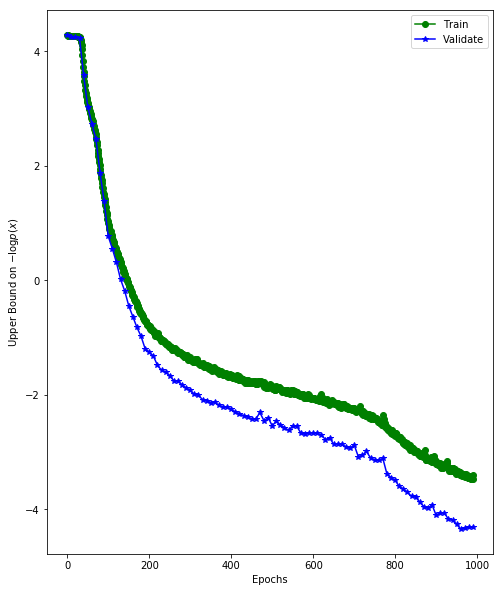

In [6]:
# Plots the training and validation ELBO of the learned model 
load_model_elbo()

Model parameters in:  ./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP990-params.npz
	<<Reloading Model>>
	<<Loading structure (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-config.pkl) and model (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP990-params.npz) / opt (./chkpt/lorenz/DMM_lr-0_0008-dh-40-ds-3-nl-relu-bs-200-ep-1000-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP990-optParams.npz) weights>>
Adding/Modifying loaded parameters:  validate_only  to  True
	<<Nparameters: 56741>>
	<<Anneal = 1 in 2.0 param. updates>>
	<<Building with RNN dropout:0.0>>
	<<In _LSTM_RNN_layer with dropout 0.0000>>
	<<Completed DMM setup>>
	<<_buildModel took : 16.4335 seconds>>
mu.shape=(10, 40, 3)
zvec.shape=(10, 40, 3)
state.shape=(10, 40, 3)


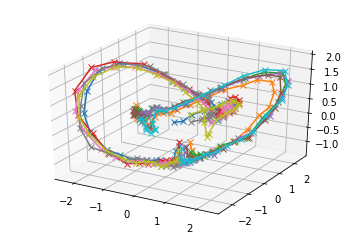

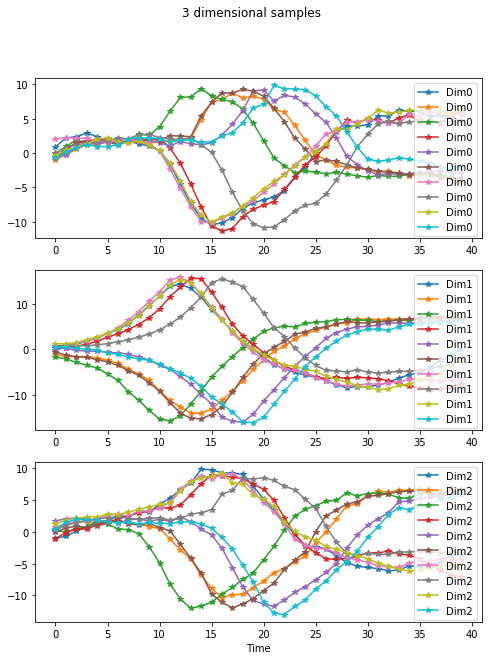

In [15]:
# Draws sample trajectories from the (learned) generative model
sample_from_model()